# Machine Learning and Modeling

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

import sklearn.preprocessing as preproc

### Part of the intro slides
#### Entropy calculations for decision tree toy example

In [2]:
# Entropy before the split
entropy1 = -((6/16) * np.log2(6/16))-((10/16) * np.log2(10/16))
entropy1

0.954434002924965

In [3]:
# Entroy after the split
entropy2 = \
(8/16) * (-(8/8) * np.log2(8/8)) \
+ \
((8/16) * (- (2/8) * np.log2(2/8) - (6/8) * np.log2(6/8) ))
entropy2

0.4056390622295664

In [4]:
#Information Gain
entropy1 - entropy2

0.5487949406953987

## 1. Decision Trees

In [5]:
df = pd.read_excel('write-off.xlsx')

In [6]:
df

,Name,Balance,Age,Employed,Write-off
0,Mike,200000,42,no,yes
1,Mary,35000,33,yes,no
2,Claudio,115000,40,no,no
3,Robert,29000,23,yes,yes
4,Dora,72000,31,no,no


Balance, Age and Employed are independent variables, and Write-off is the predicted variable. Of these, the Write-off and Employed columns are strings and have to be converted to numerical variables so they can be used in algorithms.

In [7]:
df['Write-off'] = df['Write-off'].astype('category') #convert to category
df['write-off-label'] = df['Write-off'].cat.codes #use category codes as labels
df = pd.get_dummies(df, columns=["Employed"]) #one hot encoding using pandas
df

,Name,Balance,Age,Write-off,write-off-label,Employed_no,Employed_yes
0,Mike,200000,42,yes,1,1,0
1,Mary,35000,33,no,0,0,1
2,Claudio,115000,40,no,0,1,0
3,Robert,29000,23,yes,1,0,1
4,Dora,72000,31,no,0,1,0


In [8]:
type(df['Write-off'])

pandas.core.series.Series

In [9]:
df = df.iloc[:,[0,3,4,1,2,5,6]]
df

,Name,Write-off,write-off-label,Balance,Age,Employed_no,Employed_yes
0,Mike,yes,1,200000,42,1,0
1,Mary,no,0,35000,33,0,1
2,Claudio,no,0,115000,40,1,0
3,Robert,yes,1,29000,23,0,1
4,Dora,no,0,72000,31,1,0


In [10]:
df.iloc[:, 2:]

,write-off-label,Balance,Age,Employed_no,Employed_yes
0,1,200000,42,1,0
1,0,35000,33,0,1
2,0,115000,40,1,0
3,1,29000,23,0,1
4,0,72000,31,1,0


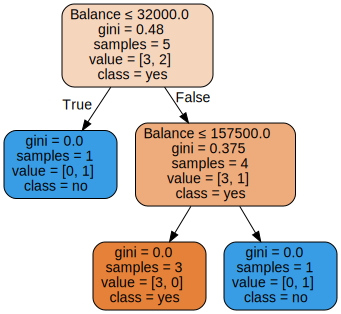

In [11]:
X = df.iloc[:,3:]
y = df.iloc[:,2]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("df") 

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         class_names=['yes', 'no'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

***

In [12]:
iris = sm.datasets.get_rdataset('iris').data
iris.sample(6)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
134,6.1,2.6,5.6,1.4,virginica
148,6.2,3.4,5.4,2.3,virginica
108,6.7,2.5,5.8,1.8,virginica
44,5.1,3.8,1.9,0.4,setosa
70,5.9,3.2,4.8,1.8,versicolor
57,4.9,2.4,3.3,1.0,versicolor


In [13]:
iris.pivot_table(columns = ['Species'], aggfunc = [np.mean, min, max]).transpose()


Petal.Length  Petal.Width  Sepal.Length  Sepal.Width
     Species                                                         
mean setosa             1.462        0.246         5.006        3.428
     versicolor         4.260        1.326         5.936        2.770
     virginica          5.552        2.026         6.588        2.974
min  setosa             1.000        0.100         4.300        2.300
     versicolor         3.000        1.000         4.900        2.000
     virginica          4.500        1.400         4.900        2.200
max  setosa             1.900        0.600         5.800        4.400
     versicolor         5.100        1.800         7.000        3.400
     virginica          6.900        2.500         7.900        3.800

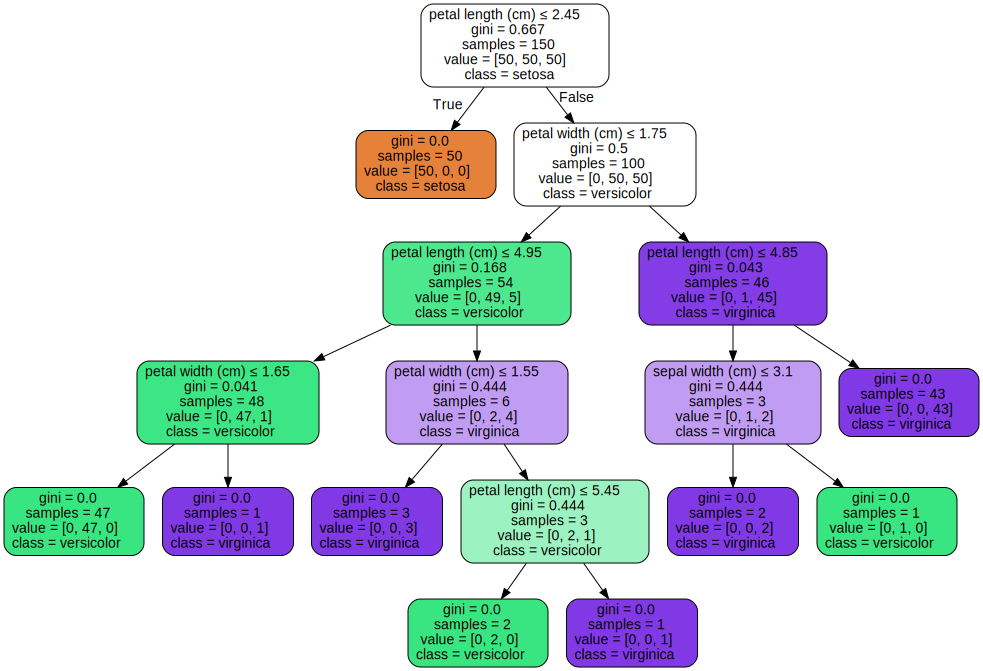

In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'), Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'), Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'), Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'), Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'), Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'), Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'), Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'), Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'), Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'), Text(154.52307692307693

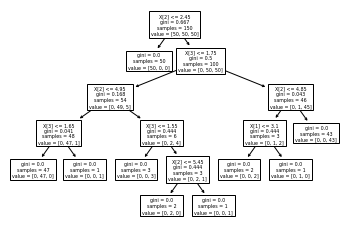

In [15]:
print(tree.plot_tree(clf))

In [16]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

***
#### With this model, how do I predict if I have the measurements for a new flower?

In [17]:
# let us remind ourselves of what features need to predict a flower's species

iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
# let us also look at existing feature set

X[:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [19]:
# Next, the measurements for the new flower

new_flower = [[5,3,1,2]]

In [20]:
# Now the prediction

clf.predict(new_flower)

array([0])

In [21]:
# The above means it is the category at index 1 in the target
# Let us look at what the target names are.
# We see that the 'versicolor' is at index 1, so that is the prediction for the new flower

iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [22]:
# or, all of the above in one line

print(iris.target_names[clf.predict(new_flower)])

['setosa']


##### Confusion Matrix and Classification Report

In [23]:
confusion_matrix(y_true = y, y_pred = clf.predict(X))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])

In [24]:
print(classification_report(y_true = y, y_pred = clf.predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



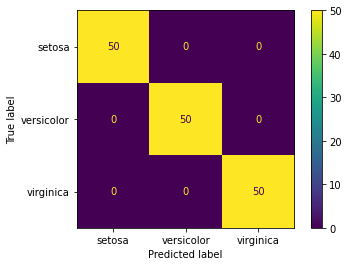

In [25]:
plot_confusion_matrix(clf, X, y, display_labels=iris.target_names);

In [26]:
# As can be seen below, the model does not give class probabilities
clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
# Get class probabilities
clf.predict_proba(X[:5])

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

### Decision Tree Regression

In [28]:
from sklearn import datasets

X = datasets.load_boston()['data']
y = datasets.load_boston()['target']
features = datasets.load_boston()['feature_names']
DESCR = datasets.load_boston()['DESCR']

boston_df = pd.DataFrame(X, columns = features)
boston_df.insert(0,'medv', y)

In [29]:
print(DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [30]:
boston_df

,medv,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,20.6,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,23.9,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,22.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [32]:
model = tree.DecisionTreeRegressor()
# model = tree.DecisionTreeRegressor(max_depth=12)
model = model.fit(X_train, y_train)
model.predict(X_test)

array([17.5, 18.5, 21. , 13.8, 21.4, 25. , 15.6, 44.8, 11.8, 18.9, 32.2,
       21. , 44.8, 24.8, 19. , 15. , 13.8, 21.1, 19.9, 23.7, 44.8, 22.8,
       22.9, 24. , 28.7, 23.7, 12.6, 24.6, 24.3, 16.1, 24. , 19.4, 11.8,
       14. , 10.2, 50. , 19.7, 13.8, 29.6, 33. , 24.7, 23. , 21.9, 14.9,
       33.8, 33. , 35.4, 16.2, 30.5, 11.7, 19.4, 25. , 33.1,  8.1, 24.7,
       50. , 18.8, 28.6, 21.2, 15.1, 28.7, 13.3, 12.7, 34.6, 22.6, 23.6,
       24.2, 33.4, 28.1, 27.5, 10.2, 23.3, 22.1, 15. , 50. , 28.4, 22.9,
        7. , 33.4, 16.6, 31.7, 29. , 25. , 17.7, 17.8, 18.7, 21.2, 10.9,
       50. , 32.2, 19.7, 26.6, 21.7, 14.9, 28.6, 16.6, 10.4, 20.1, 18.8,
       21.2, 22.9, 50. ])

In [33]:
print(model.tree_.max_depth)

17


In [34]:
y_pred  =  model.predict(X_test)

print('MSE = ', mean_squared_error(y_test,y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE = ', mean_absolute_error(y_test,y_pred))


MSE =  15.758333333333331
RMSE =  3.9696767290716926
MAE =  2.8127450980392155


Text(0, 0.5, 'Predicted')

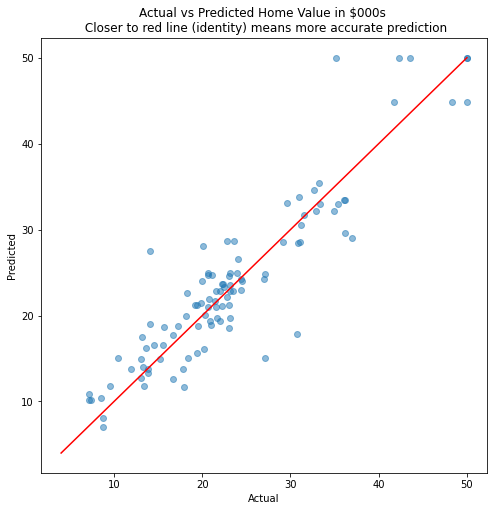

In [35]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Home Value in $000s \n Closer to red line (identity) means more accurate prediction')
plt.plot( [4,50],[4,50], color='red' )
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [36]:
# R-squared calculation
pd.DataFrame({'actual':y_test, 'predicted':y_pred}).corr()**2

,actual,predicted
actual,1.000000,0.838688
predicted,0.838688,1.000000


In [37]:
boston_df.medv.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

### How well did my model generalize?
### Predict on the training data

In [38]:
# R-squared
pd.DataFrame({'actual':y_train, 'predicted':model.predict(X_train)}).corr()**2

,actual,predicted
actual,1.0,1.0
predicted,1.0,1.0


In [39]:
y_pred  =  model.predict(X_train)

print('MSE = ', mean_squared_error(y_train,y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_train,y_pred)))
print('MAE = ', mean_absolute_error(y_train,y_pred))

MSE =  0.0
RMSE =  0.0
MAE =  0.0


Text(0, 0.5, 'Predicted')

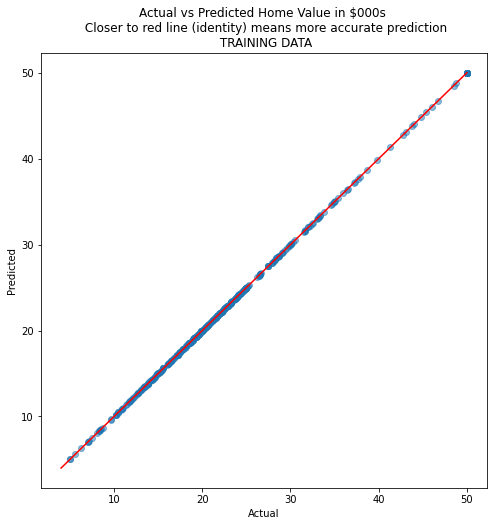

In [40]:
plt.figure(figsize = (8,8))
plt.scatter(y_train, model.predict(X_train), alpha=0.5)
plt.title('Actual vs Predicted Home Value in $000s \n Closer to red line (identity) means more accurate prediction\n TRAINING DATA')
plt.plot( [4,50],[4,50], color='red' )
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [41]:
249/(249+16)

0.939622641509434

## 2. Random Forest

In [42]:
# load the data
college = pd.read_csv('collegePlace.csv')

In [43]:
# divide the dataset into train and test sets, separating the features and target variable
X = college[['Age', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs']].values
y = college['PlacedOrNot'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
# classify using random forest classifier
RandomForest = RandomForestClassifier()
model_rf = RandomForest.fit(X_train, y_train)
pred = model_rf.predict(X_test)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       270
           1       0.95      0.85      0.89       324

    accuracy                           0.89       594
   macro avg       0.89      0.90      0.89       594
weighted avg       0.90      0.89      0.89       594



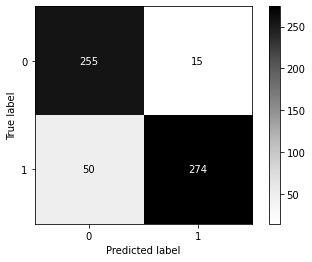

In [45]:
print(classification_report(y_true = y_test, y_pred = pred))
plot_confusion_matrix(model_rf, X = X_test, y_true = y_test, cmap='Greys');

In [46]:
model_rf.predict_proba(X_test)

array([[0.01      , 0.99      ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       ...,
       [0.614     , 0.386     ],
       [0.75132523, 0.24867477],
       [0.80492192, 0.19507808]])

### Random Forest for Regression

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
diamonds = sns.load_dataset("diamonds")

In [49]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [50]:
diamonds = pd.get_dummies(diamonds)

In [51]:
diamonds.head()

,carat,depth,table,price,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,326,3.95,3.98,2.43,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,1,0,...,1,0,0,0,0,0,1,0,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [52]:
# Define X and y as arrays. y is the price column, X is everything else
X = diamonds.loc[:, diamonds.columns != 'price'].values
y = diamonds.price.values

In [53]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [54]:
# Fit model
model_rf_regr = RandomForestRegressor(max_depth=2, random_state=0)
model_rf_regr.fit(X_train, y_train)
model_rf_regr.predict(X_test)

array([6127.35853998, 6127.35853998, 1056.16746739, ..., 1056.16746739,
       6149.66095763, 3051.56796176])

In [55]:
# Evaluate model
y_pred  =  model_rf_regr.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MSE = ', mean_squared_error(y_test,y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE = ', mean_absolute_error(y_test,y_pred))


MSE =  2772827.7160247588
RMSE =  1665.1809859666182
MAE =  1046.954822312954


Text(0, 0.5, 'Predicted')

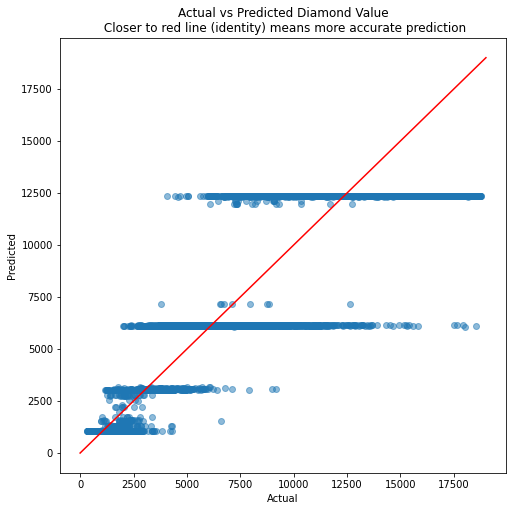

In [56]:
# Evaluate residuals
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Diamond Value\n Closer to red line (identity) means more accurate prediction')
plt.plot( [0,19000],[0,19000], color='red' )
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [57]:
diamonds.price.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [58]:
# R-squared calculation
pd.DataFrame({'actual':y_test, 'predicted':y_pred}).corr()**2

,actual,predicted
actual,1.000000,0.828538
predicted,0.828538,1.000000


In [59]:
importance = model_rf_regr.feature_importances_
feature_names = diamonds.loc[:, diamonds.columns != 'price'].columns
pd.DataFrame({'Feature':feature_names, 'Importance':importance}).sort_values(by='Importance', ascending=False)

,Feature,Importance
0,carat,0.731067
4,y,0.268933
14,color_G,0.000000
24,clarity_SI2,0.000000
23,clarity_SI1,0.000000
22,clarity_VS2,0.000000
21,clarity_VS1,0.000000
20,clarity_VVS2,0.000000
19,clarity_VVS1,0.000000
18,clarity_IF,0.000000


### Random Forest Regression - Another Example

In [60]:
from sklearn import datasets

X = datasets.load_boston()['data']
y = datasets.load_boston()['target']
features = datasets.load_boston()['feature_names']
DESCR = datasets.load_boston()['DESCR']

boston_df = pd.DataFrame(X, columns = features)
boston_df.insert(0,'medv', y)

In [61]:
boston_df

,medv,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,20.6,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,23.9,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,22.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [63]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=2, random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [64]:
y_pred  =  model.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MSE = ', mean_squared_error(y_test,y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE = ', mean_absolute_error(y_test,y_pred))


MSE =  19.682923566979657
RMSE =  4.436544101773323
MAE =  3.1833674928847095


count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64


<AxesSubplot:ylabel='Frequency'>

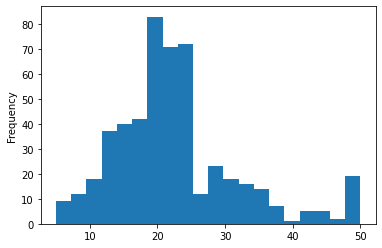

In [65]:
print(boston_df.medv.describe())
boston_df.medv.plot.hist(bins=20)

Text(0, 0.5, 'Predicted')

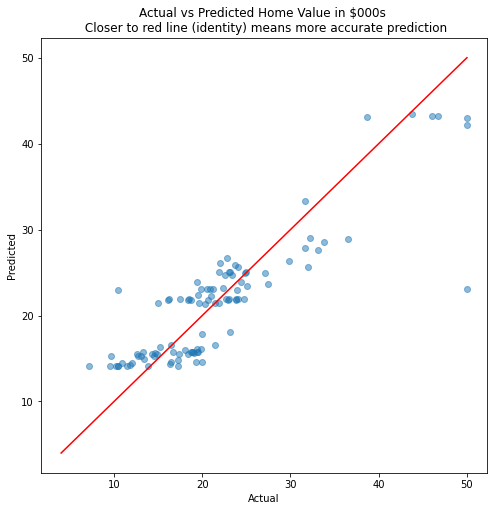

In [66]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Home Value in $000s \n Closer to red line (identity) means more accurate prediction')
plt.plot( [4,50],[4,50], color='red' )
plt.xlabel("Actual")
plt.ylabel("Predicted")

## 3. XGBoost - Classification

In [67]:
# load the data
college = pd.read_csv('collegePlace.csv')
college = pd.get_dummies(college)

In [68]:
college

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Gender_Female,Gender_Male,Stream_Civil,Stream_Computer Science,Stream_Electrical,Stream_Electronics And Communication,Stream_Information Technology,Stream_Mechanical
0,22,1,8,1,1,1,0,1,0,0,0,1,0,0
1,21,0,7,1,1,1,1,0,0,1,0,0,0,0
2,22,1,6,0,0,1,1,0,0,0,0,0,1,0
3,21,0,8,0,1,1,0,1,0,0,0,0,1,0
4,22,0,8,1,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,23,0,7,0,0,0,0,1,0,0,0,0,1,0
2962,23,1,7,1,0,0,0,1,0,0,0,0,0,1
2963,22,1,7,0,0,0,0,1,0,0,0,0,1,0
2964,22,1,7,0,0,0,0,1,0,1,0,0,0,0


In [69]:
# Test train split
X = college.loc[:, college.columns != 'PlacedOrNot'].values
y = college['PlacedOrNot'].values
feature_names = college.loc[:, college.columns != 'PlacedOrNot'].columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [70]:
# Fit the model
from xgboost import XGBClassifier

model_xgb = XGBClassifier(use_label_encoder=False, objective= 'binary:logistic')
model_xgb.fit(X_train, y_train)

[21:58:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [71]:
# Perform predictions, and store the results in a variable called 'pred'
pred = model_xgb.predict(X_test)

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       264
           1       0.95      0.85      0.89       330

    accuracy                           0.89       594
   macro avg       0.89      0.89      0.89       594
weighted avg       0.90      0.89      0.89       594



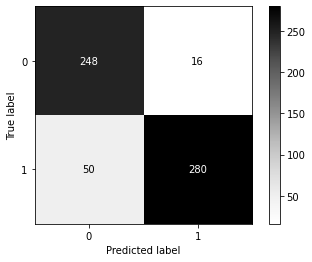

In [72]:
# Check the classification report and the confusion matrix
print(classification_report(y_true = y_test, y_pred = pred))
plot_confusion_matrix(model_xgb, X = X_test, y_true = y_test, cmap='Greys');

In [73]:
# Check feature importance
# This can be misleading though - check out https://explained.ai/rf-importance/
importance = model_xgb.feature_importances_
pd.DataFrame({'Feature':feature_names, 'Importance':importance}).sort_values(by='Importance', ascending=False)

,Feature,Importance
2,CGPA,0.559334
1,Internships,0.076206
7,Stream_Civil,0.062834
9,Stream_Electrical,0.053090
0,Age,0.051155
12,Stream_Mechanical,0.042047
10,Stream_Electronics And Communication,0.038735
4,HistoryOfBacklogs,0.033272
3,Hostel,0.023149
8,Stream_Computer Science,0.021433


In [74]:
model_xgb.predict_proba(X_test).round(3)

array([[0.902, 0.098],
       [0.001, 0.999],
       [0.766, 0.234],
       ...,
       [0.001, 0.999],
       [0.667, 0.333],
       [0.848, 0.152]], dtype=float32)

### XGBoost for Regression

In [75]:
# Load data
diamonds = sns.load_dataset("diamonds")

In [76]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [77]:
# Get dummy variables
diamonds = pd.get_dummies(diamonds)

In [78]:
diamonds.head()

,carat,depth,table,price,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,326,3.95,3.98,2.43,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,1,0,...,1,0,0,0,0,0,1,0,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [79]:
# Define X and y as arrays. y is the price column, X is everything else
X = diamonds.loc[:, diamonds.columns != 'price'].values
y = diamonds.price.values

In [80]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [81]:
# Fit model
from xgboost import XGBRegressor

model_xgb_regr = XGBRegressor()
model_xgb_regr.fit(X_train, y_train)
model_xgb_regr.predict(X_test)

array([10866.4795 ,  1884.0446 ,   899.6575 , ...,   905.23987,
        2443.4978 ,  1399.364  ], dtype=float32)

In [82]:
# Evaluate model
y_pred  =  model_xgb_regr.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MSE = ', mean_squared_error(y_test,y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE = ', mean_absolute_error(y_test,y_pred))


MSE =  291403.45223071566
RMSE =  539.8179806478436
MAE =  283.15106394523417


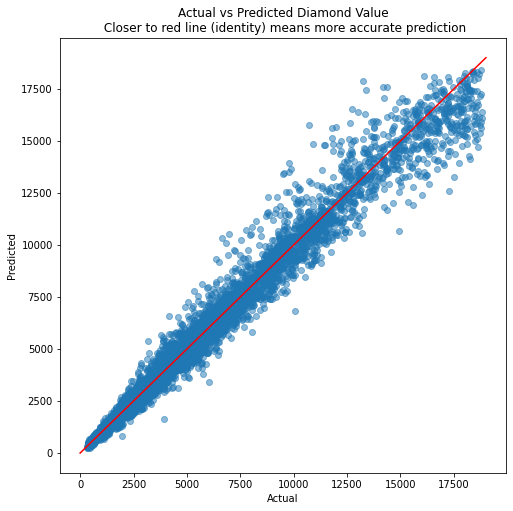

In [83]:
# Evaluate residuals
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Diamond Value\n Closer to red line (identity) means more accurate prediction')
plt.plot( [0,19000],[0,19000], color='red' )
plt.xlabel("Actual")
plt.ylabel("Predicted");

In [84]:
# R-squared calculation
pd.DataFrame({'actual':y_test, 'predicted':y_pred}).corr()**2

,actual,predicted
actual,1.000000,0.981914
predicted,0.981914,1.000000


In [85]:
diamonds.price.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

## 4. Linear Discriminant Analysis

In [86]:
# load the data
college = pd.read_csv('collegePlace.csv')

In [87]:
college

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


In [88]:
college.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [89]:
# divide the dataset into train and test sets, separating the features and target variable
X = college[['Age', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs']].values
y = college['PlacedOrNot'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [90]:
# apply Linear Discriminant Analysis
LDA = LinearDiscriminantAnalysis()
model_lda = LDA.fit(X = X_train, y = y_train)
pred = model_lda.predict(X_test)

              precision    recall  f1-score   support

           0       0.76      0.79      0.78       278
           1       0.81      0.78      0.79       316

    accuracy                           0.79       594
   macro avg       0.79      0.79      0.79       594
weighted avg       0.79      0.79      0.79       594



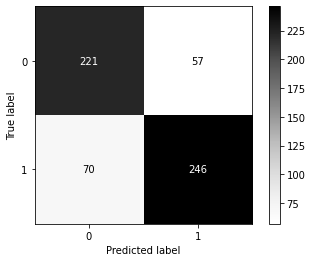

In [91]:
# evaluate performance
plot_confusion_matrix(model_lda, X = X_test, y_true = y_test, cmap='Greys')
print(classification_report(y_true = y_test, y_pred = pred))

In [92]:
confusion_matrix(y_true = y_test, y_pred = pred)

array([[221,  57],
       [ 70, 246]])

In [93]:
# Get predictions
model_lda.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,

In [94]:
# Get probability of class membership
model_lda.predict_proba(X_test)

array([[0.6711627 , 0.3288373 ],
       [0.79370336, 0.20629664],
       [0.3733702 , 0.6266298 ],
       ...,
       [0.88542155, 0.11457845],
       [0.12828887, 0.87171113],
       [0.09583482, 0.90416518]])

## 5. Support Vector Machines - Classification

In [95]:
# load the data & convert categoricals into numerical variables
college = pd.read_csv('collegePlace.csv')

college = pd.get_dummies(college)
college.head()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Gender_Female,Gender_Male,Stream_Civil,Stream_Computer Science,Stream_Electrical,Stream_Electronics And Communication,Stream_Information Technology,Stream_Mechanical
0,22,1,8,1,1,1,0,1,0,0,0,1,0,0
1,21,0,7,1,1,1,1,0,0,1,0,0,0,0
2,22,1,6,0,0,1,1,0,0,0,0,0,1,0
3,21,0,8,0,1,1,0,1,0,0,0,0,1,0
4,22,0,8,1,0,1,0,1,0,0,0,0,0,1


In [96]:
# divide the dataset into train and test sets, separating the features and target variable
X = college.drop(['PlacedOrNot'], axis=1).values
y = college['PlacedOrNot'].values

scale = preproc.StandardScaler().fit(X)
X = scale.transform(X)
# X = preproc.StandardScaler().fit_transform(X) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [97]:
# fit the model
clf = svm.SVC() # setting probability=True here can allow us to get probabilities later
model_svm = clf.fit(X_train, y_train)
pred = model_svm.predict(X_test)

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       267
           1       0.92      0.83      0.87       327

    accuracy                           0.86       594
   macro avg       0.86      0.87      0.86       594
weighted avg       0.87      0.86      0.86       594



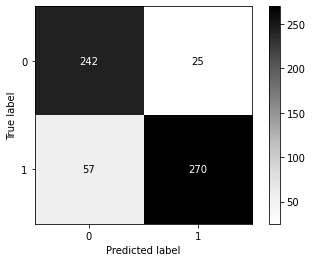

In [98]:
# evaluate performance
plot_confusion_matrix(model_svm, X = X_test, y_true = y_test, cmap='Greys')
print(classification_report(y_true = y_test, y_pred = pred))

#### Support Vector Machines - Regression

In [99]:
# Load the Boston house prices dataset
from sklearn import datasets

X = datasets.load_boston()['data']
y = datasets.load_boston()['target']
features = datasets.load_boston()['feature_names']
DESCR = datasets.load_boston()['DESCR']

boston_df = pd.DataFrame(X, columns = features)
boston_df.insert(0,'medv', y)

In [100]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [101]:
# Fit model
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
model_svr = make_pipeline(StandardScaler(), SVR())
model_svr.fit(X, y)
model_svr = model_svr.fit(X_train, y_train)
model_svr.predict(X_test)

array([27.04408389, 15.66750294, 25.13206994, 16.57965879, 24.17286514,
       15.16042717, 37.11825217, 12.35762408, 30.8738233 , 17.5117856 ,
       12.05654008, 14.31416134, 23.50594491, 12.79662049, 15.78417932,
       11.8898071 , 12.15633562, 22.51231178, 18.45598265, 26.09550969,
       15.46645975, 32.49797846, 14.46258085, 28.86989532, 14.33598138,
       23.9098298 , 23.78186673, 35.16042767, 29.05366506, 22.2725051 ,
       27.83348669, 12.37946853, 17.47150756, 14.72695798, 16.25988634,
       24.79459656, 15.02587979, 20.50786017, 26.49637652, 17.24286307,
       15.83016319, 33.60691118, 21.91712692, 22.63753957, 29.70089486,
       18.5555132 , 23.68275555, 14.91893275, 21.15367439, 19.75251409,
       17.22787795, 21.15876358, 23.89846209, 21.72305286, 26.12530316,
       19.32014084, 22.91597856, 21.18214046, 23.29912408, 28.40864595,
       24.24647   , 22.96593072, 15.20687384, 22.12539217, 11.88218634,
       20.45310384, 26.14124299, 17.81458271, 21.5425986 , 23.86

In [102]:
# Evaluate model
y_pred  =  model_svr.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MSE = ', mean_squared_error(y_test,y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE = ', mean_absolute_error(y_test,y_pred))

MSE =  20.580641025805235
RMSE =  4.53658914007046
MAE =  2.8732252971818433


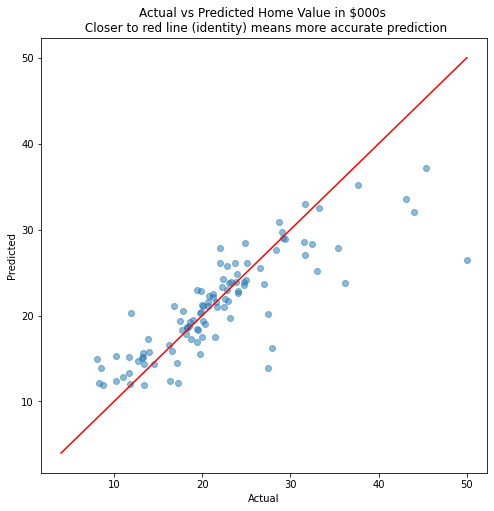

In [103]:
# Look at residuals
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Home Value in $000s \n Closer to red \
line (identity) means more accurate prediction')
plt.plot( [4,50],[4,50], color='red' )
plt.xlabel("Actual")
plt.ylabel("Predicted");

## 6. Naive Bayes

In [104]:
from sklearn import datasets

X = datasets.load_wine()['data']
y = datasets.load_wine()['target']
features = datasets.load_wine()['feature_names']
DESCR = datasets.load_wine()['DESCR']
classes = datasets.load_wine()['target_names']

wine_df = pd.DataFrame(X, columns = features)
wine_df.insert(0,'class', y)

In [105]:
wine_df.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [108]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
pred = model_nb.predict(X_test)

In [109]:
y_pred  =  model_nb.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
print('Accuracy = ', accuracy_score(y_test,y_pred))

Accuracy =  1.0


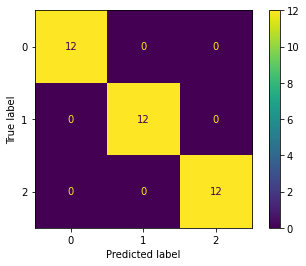

In [110]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_nb, X_test, y_test);


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



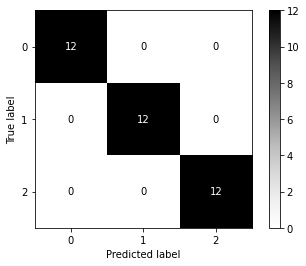

In [111]:
plot_confusion_matrix(model_nb, X = X_test, y_true = y_test, cmap='Greys')
print(classification_report(y_true = y_test, y_pred = pred))

In [112]:
wine_df['class'].value_counts()

1    71
0    59
2    48
Name: class, dtype: int64

## 7. kNN classifier

In [113]:
# load the data
college = pd.read_csv('collegePlace.csv')
college = pd.get_dummies(college)

In [114]:
college.sample(4)

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Gender_Female,Gender_Male,Stream_Civil,Stream_Computer Science,Stream_Electrical,Stream_Electronics And Communication,Stream_Information Technology,Stream_Mechanical
2463,19,1,6,1,0,0,1,0,0,1,0,0,0,0
677,22,0,7,0,0,0,0,1,0,1,0,0,0,0
2510,21,1,6,0,0,0,0,1,0,1,0,0,0,0
458,21,0,6,1,0,1,0,1,0,0,0,0,0,1


In [115]:
# Test train split
X = college.loc[:, college.columns != 'PlacedOrNot'].values
X = preproc.StandardScaler().fit_transform(X) 
y = college['PlacedOrNot'].values
feature_names = college.loc[:, college.columns != 'PlacedOrNot'].columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [116]:
pd.DataFrame(X, columns = college.loc[:, college.columns != 'PlacedOrNot'].columns).describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,Gender_Female,Gender_Male,Stream_Civil,Stream_Computer Science,Stream_Electrical,Stream_Electronics And Communication,Stream_Information Technology,Stream_Mechanical
count,2.966000e+03,2.966000e+03,2.966000e+03,2.966000e+03,2.966000e+03,2.966000e+03,2.966000e+03,2.966000e+03,2.966000e+03,2.966000e+03,2.966000e+03,2.966000e+03,2.966000e+03
mean,1.554163e-15,-9.751322e-16,-1.168467e-15,6.924857e-17,-3.714344e-16,4.615698e-16,-4.615698e-16,2.166544e-16,-2.118632e-16,2.576795e-16,5.803030e-16,-9.575019e-17,4.038876e-17
std,1.000169e+00,1.000169e+00,1.000169e+00,1.000169e+00,1.000169e+00,1.000169e+00,1.000169e+00,1.000169e+00,1.000169e+00,1.000169e+00,1.000169e+00,1.000169e+00,1.000169e+00
min,-1.876516e+00,-9.507732e-01,-2.143313e+00,-6.066969e-01,-4.877463e-01,-4.454030e-01,-2.245158e+00,-3.459303e-01,-5.952629e-01,-3.562298e-01,-4.084089e-01,-5.511227e-01,-4.084089e-01
25%,-3.667516e-01,-9.507732e-01,-1.109812e+00,-6.066969e-01,-4.877463e-01,-4.454030e-01,4.454030e-01,-3.459303e-01,-5.952629e-01,-3.562298e-01,-4.084089e-01,-5.511227e-01,-4.084089e-01
50%,-3.667516e-01,4.004454e-01,-7.631043e-02,-6.066969e-01,-4.877463e-01,-4.454030e-01,4.454030e-01,-3.459303e-01,-5.952629e-01,-3.562298e-01,-4.084089e-01,-5.511227e-01,-4.084089e-01
75%,3.881306e-01,4.004454e-01,9.571907e-01,1.648269e+00,-4.877463e-01,-4.454030e-01,4.454030e-01,-3.459303e-01,1.679930e+00,-3.562298e-01,-4.084089e-01,-5.511227e-01,-4.084089e-01
max,6.427188e+00,3.102883e+00,1.990692e+00,1.648269e+00,2.050246e+00,2.245158e+00,4.454030e-01,2.890755e+00,1.679930e+00,2.807176e+00,2.448527e+00,1.814478e+00,2.448527e+00


In [117]:
# Fit the model
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)


KNeighborsClassifier()

In [118]:
# Perform predictions, and store the results in a variable called 'pred'
pred = model_knn.predict(X_test)

              precision    recall  f1-score   support

           0       0.78      0.85      0.82       245
           1       0.89      0.83      0.86       349

    accuracy                           0.84       594
   macro avg       0.84      0.84      0.84       594
weighted avg       0.85      0.84      0.84       594



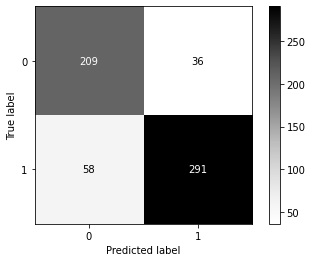

In [119]:
# Check the classification report and the confusion matrix
print(classification_report(y_true = y_test, y_pred = pred))
plot_confusion_matrix(model_knn, X = X_test, y_true = y_test, cmap='Greys');

In [120]:
model_knn.predict_proba(X_test).round(3)

array([[1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       ...,
       [0. , 1. ],
       [0.8, 0.2],
       [0.6, 0.4]])

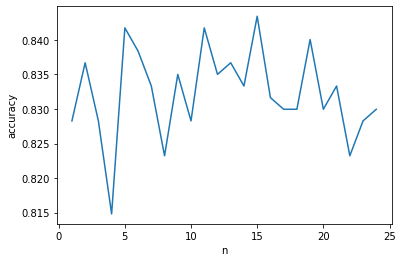

,n,accuracy
14,15,0.843434
4,5,0.841751
10,11,0.841751
18,19,0.840067
5,6,0.838384


In [121]:
# Loop through n from 1 to 25 to find the best n
acc = []
for n in range(1,25):
    model_knn = KNeighborsClassifier(n_neighbors=n)
    model_knn.fit(X_train, y_train)
    pred = model_knn.predict(X_test)
    acc.append([n, accuracy_score(y_test, pred)])
sns.lineplot(data = pd.DataFrame(acc, columns=['n','accuracy']), x = 'n', y = 'accuracy')
plt.show()
pd.DataFrame(acc, columns=['n','accuracy']).sort_values(by='accuracy', ascending=False).head()

### kNN Regressor

In [122]:
# Load data
diamonds = sns.load_dataset("diamonds")

In [123]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [124]:
# Get dummy variables
diamonds = pd.get_dummies(diamonds)

In [125]:
diamonds.head()

,carat,depth,table,price,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,326,3.95,3.98,2.43,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,1,0,...,1,0,0,0,0,0,1,0,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [126]:
# Define X and y as arrays. y is the price column, X is everything else
X = diamonds.loc[:, diamonds.columns != 'price'].values
X = preproc.StandardScaler().fit_transform(X) 
y = diamonds.price.values

In [127]:
X.shape

(53940, 26)

In [128]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [129]:
# Fit model
from sklearn.neighbors import KNeighborsRegressor
model_knn_regress = KNeighborsRegressor(n_neighbors=1)
model_knn_regress.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [130]:
# Evaluate model
y_pred  =  model_knn_regress.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MSE = ', mean_squared_error(y_test,y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test,y_pred)))
print('MAE = ', mean_absolute_error(y_test,y_pred))


MSE =  934684.8261957731
RMSE =  966.7909940601294
MAE =  466.95949202817945


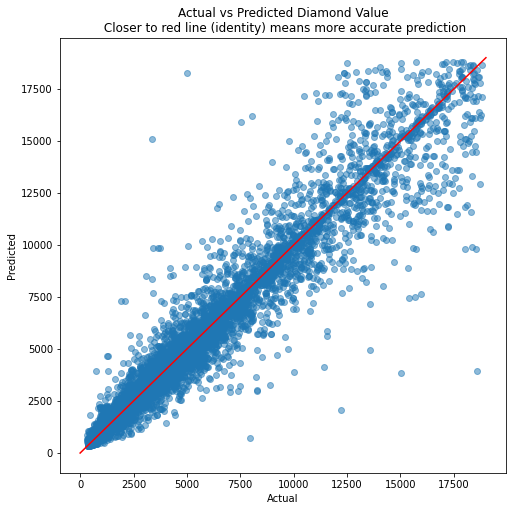

In [131]:
# Evaluate residuals
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Diamond Value\n Closer to red line (identity) means more accurate prediction')
plt.plot( [0,19000],[0,19000], color='red' )
plt.xlabel("Actual")
plt.ylabel("Predicted");

In [132]:
# R-squared calculation
pd.DataFrame({'actual':y_test, 'predicted':y_pred}).corr()**2

,actual,predicted
actual,1.000000,0.941973
predicted,0.941973,1.000000


In [133]:
diamonds.price.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

## 8. k-Means Clustering

In [134]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [135]:
iris = sm.datasets.get_rdataset('iris').data

In [136]:
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [137]:
x = iris.iloc[:, 0:4]
kmeans = KMeans(3, random_state = 1)
clusters = kmeans.fit_predict(x)

In [138]:
iris['clusters'] = clusters

In [139]:
df = iris.loc[:,['Species', 'clusters']]
pd.crosstab(index = df['Species'], 
            columns = df['clusters'], margins=True)

clusters,0,1,2,All
Species,,,,
setosa,0,50,0,50
versicolor,48,0,2,50
virginica,14,0,36,50
All,62,50,38,150


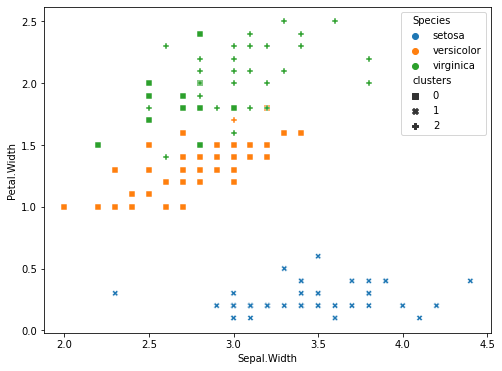

In [140]:
plt.figure(figsize = (8,6))
sns.scatterplot(x='Sepal.Width', y='Petal.Width', data=iris, 
                hue='Species', style='clusters', 
                markers= {0: "s", 1: "X", 2: "P"});

In [141]:
kmeans.fit_predict(x)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [142]:
len(kmeans.fit_transform(x))

150

In [143]:
kmeans.fit_transform(x)[:3]

array([[3.41925061, 0.14135063, 5.0595416 ],
       [3.39857426, 0.44763825, 5.11494335],
       [3.56935666, 0.4171091 , 5.27935534]])

In [144]:
x[:3]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


## 9. Hierarchical Clustering

In [145]:
mtcars = sm.datasets.get_rdataset('mtcars').data
data = mtcars.iloc[:, :]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data) 
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,0.153299,-0.106668,-0.579750,-0.543655,0.576594,-0.620167,-0.789601,-0.881917,1.208941,0.430331,0.746967
1,0.153299,-0.106668,-0.579750,-0.543655,0.576594,-0.355382,-0.471202,-0.881917,1.208941,0.430331,0.746967
2,0.456737,-1.244457,-1.006026,-0.795570,0.481584,-0.931678,0.432823,1.133893,1.208941,0.430331,-1.140108
3,0.220730,-0.106668,0.223615,-0.543655,-0.981576,-0.002336,0.904736,1.133893,-0.827170,-0.946729,-1.140108
4,-0.234427,1.031121,1.059772,0.419550,-0.848562,0.231297,-0.471202,-0.881917,-0.827170,-0.946729,-0.511083


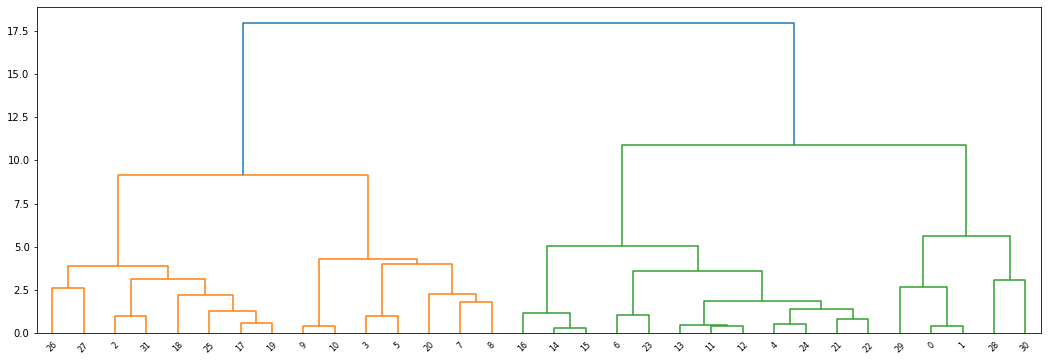

In [146]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
X = data_scaled
Z = linkage(X, method='ward')
fig = plt.figure(figsize=(18, 6))
dn = dendrogram(Z)


In [147]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

In [148]:
pd.DataFrame(cut_tree(Z, n_clusters=4, height=None)).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,0,0,1,2,3,2,3,2,2,2,2,3,3,3,3,3,3,1,1,1,2,3,3,3,3,1,1,1,0,0,0,1


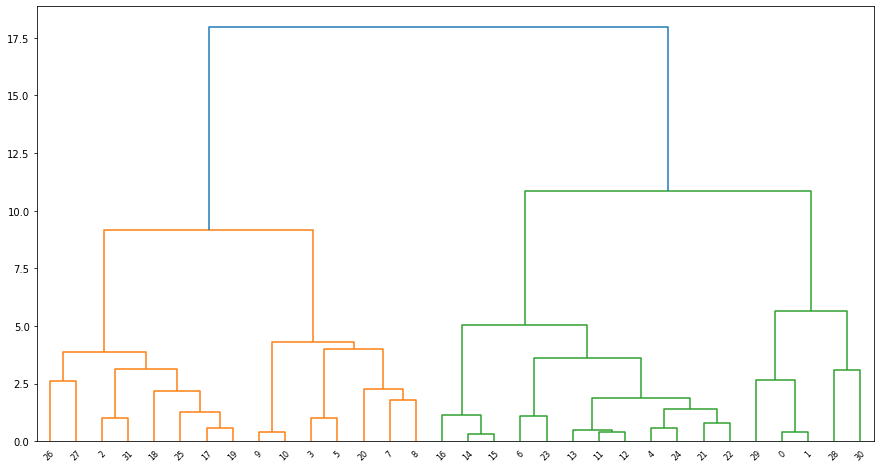

In [149]:

Z = linkage(X, method='ward')
fig = plt.figure(figsize=(15, 8))
dn = dendrogram(Z)
plt.show()

In [150]:
np.arange(0,33)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [151]:
np.array([2])

array([2])

***
## END 
***

## Distances

In [152]:
X = [[0, 1, 2],
     [3, 4, 5]]

from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric(metric = 'euclidean')
dist.pairwise(X)

array([[0.        , 5.19615242],
       [5.19615242, 0.        ]])

In [153]:
diamonds = sns.load_dataset("diamonds")

In [154]:
X = diamonds.iloc[:4,4:]

In [155]:
X

,depth,table,price,x,y,z
0,61.5,55.0,326,3.95,3.98,2.43
1,59.8,61.0,326,3.89,3.84,2.31
2,56.9,65.0,327,4.05,4.07,2.31
3,62.4,58.0,334,4.20,4.23,2.63


In [156]:
dist.pairwise(X)

array([[ 0.        ,  6.23919867, 11.05407165,  8.60087205],
       [ 6.23919867,  0.        ,  5.04861367,  8.9504525 ],
       [11.05407165,  5.04861367,  0.        , 11.33139444],
       [ 8.60087205,  8.9504525 , 11.33139444,  0.        ]])

In [157]:
from sklearn.metrics.pairwise import cosine_similarity

In [158]:
x = [1, 1, 0]
y = [0, 1, 0]

In [159]:
import scipy
scipy.spatial.distance.cosine(x,y)

0.29289321881345254

In [160]:
1- scipy.spatial.distance.cosine(x,y)

0.7071067811865475

In [161]:
cosine_similarity([x,y])

array([[1.        , 0.70710678],
       [0.70710678, 1.        ]])

#### Diagram for LDA

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns
iris = sm.datasets.get_rdataset('iris').data

In [163]:
iris[iris['Species'].isin(['setosa', 'versicolor'])]


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


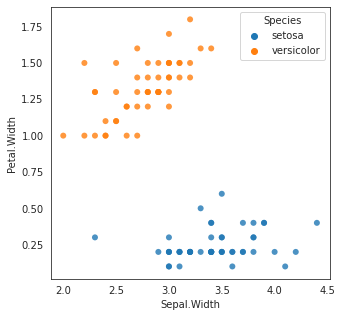

In [164]:
iris = iris[iris['Species'].isin(['setosa', 'versicolor'])]
sns.set_style(style='white')
plt.figure(figsize = (5,5))
sns.scatterplot(data = iris, x = 'Sepal.Width', y = 'Petal.Width', hue = 'Species', alpha = .8, edgecolor = 'None');